In [10]:
%reload_ext autoreload
%autoreload 2

from sklearn.naive_bayes import ComplementNB, CategoricalNB, MultinomialNB, BernoulliNB, GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import pandas as pd
from main import *

In [11]:
trial_time_spans = {
    # "1 second": [7, 8],
    # "2 seconds": [7, 9],
    "4 seconds": [7, 11],
    "6 seconds": [7, 13],
    "8 seconds": [7, 15],
    "10 seconds": [5, 15],
    "12 seconds": [3, 15],
    "15 seconds": [0, 15],
}

classifiers = {
    # 'ComplementNB': ComplementNB(),
    # 'CategoricalNB': CategoricalNB(),
    # 'MultinomialNB': MultinomialNB(),
    # 'GaussianNB': GaussianNB(),

    'BernoulliNB': BernoulliNB(),
    'XGBClassifier': XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, objective='binary:logistic'),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm="SAMME", learning_rate=0.1, n_estimators=200),
    'MLP': MLPClassifier(),
    'RF': RandomForestClassifier(n_estimators=300),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'LDA': LinearDiscriminantAnalysis(solver='svd'),
    'SVC_poly': SVC(kernel="poly", degree=3),
    'SVC_linear': SVC(kernel="linear"),
    'SVC_sigmoid': SVC(kernel="sigmoid"),
    'SVC_rbf': SVC(kernel="rbf"),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier': LGBMClassifier(),
}

def get_data(trial_time_span):
    trials, y = get_trials_and_labels(trial_kwargs={'crop_start_end': trial_time_span})

    x = [[v for k, v in i.features.items() if '' in k] for i in trials]
    x = np.array(x)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    ros = RandomOverSampler(random_state=0)
    x, y = ros.fit_resample(x, y)

    x, y = shuffle(x, y, random_state=0) or exit(1)

    print("Number of features:", x.shape[1])

    return x, y


def get_accuracies():
    accuracies = {k: [] for k in classifiers}

    for i in range(2):
        for classifier_name, classifier in classifiers.items():
            print(f"Classifier: {classifier_name}")

            cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
            score = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
            accuracies[classifier_name].extend(score)

    print(*sorted([f"{k}, {round(np.mean(v), 3)}" for k, v in accuracies.items()]), sep="\n")

    # Total mean
    print("Total mean:", round(np.mean([np.mean(v) for v in accuracies.values()]), 3))

    return accuracies

In [12]:
duration_accs = []

for trial_time_span_name, trial_time_span in trial_time_spans.items():
    print(f"Trial time span: {trial_time_span_name}")

    x, y = get_data(trial_time_span)
    accuracies = get_accuracies()

    duration_accs.append([np.mean(v) for v in accuracies.values()])

dur_acc_df = pd.DataFrame(duration_accs, columns=classifiers.keys(), index=trial_time_spans.keys())

Trial time span: 4 seconds
Getting epochs for filename data/dasps_raw_mat/S01.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S01.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epoch

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
Number of features: 455
Classifier: BernoulliNB


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 11 s (baseline off), ~71 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


Classifier: XGBClassifier
Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36031
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 455
[LightG

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 13 s (baseline off), ~99 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
Number of features: 455
Classifier: BernoulliNB
Classifier: XGBClassifier
Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Total Bins 35792
[LightGBM] [Info] Tota

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
Number of features: 455
Classifier: BernoulliNB
Classifier: XGBClassifier
Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])


only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 5 – 14.992 s (baseline off), ~155 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
Number of features: 455
Classifier: BernoulliNB
Classifier: XGBClassifier
Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36229
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Number of data points in the train set: 249, number of used features: 455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004374 seconds.
You can set `force_col_wise=true` to remove the over

/Users/jakubblaha/.local/share/virtualenvs/thesis-python-yCK4mToH/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36229
[LightGBM] [Info] Total Bins 35863
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 3 – 14.992 s (baseline off), ~183 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
Number of features: 455
Classifier: BernoulliNB
Classifier: XGBClassifier
Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 125, number of negative: 125
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35907
[LightGBM] [Info] Total Bins 36157
[LightGBM] [Info] Auto-choosing col-wise multi-thre

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:43: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  self.epoch = epoch.crop(tmin=crop_start_end[0], tmax=crop_start_end[1])
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:118: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 14.992 s (baseline off), ~225 kB, data loaded,
 '1': 1>, so metadata was not modified.
  res = mne_connectivity.spectral_connectivity_time(


[Connectivity computation done]
Number of features: 455
Classifier: BernoulliNB
Classifier: XGBClassifier
Classifier: AdaBoostClassifier
Classifier: MLP
Classifier: RF
Classifier: KNN
Classifier: LDA
Classifier: SVC_poly
Classifier: SVC_linear
Classifier: SVC_sigmoid
Classifier: SVC_rbf
Classifier: GradientBoostingClassifier
Classifier: LGBMClassifier
[LightGBM] [Info] Number of positive: 125, number of negative: 124
[LightGBM] [Info] Number of positive: 124, number of negative: 125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 249, number of used features: 455
[LightGBM] [Info] Total Bins 35911
[LightGBM] [Info] [binary:

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 10, 'display.width', 1000):
    print(dur_acc_df.T)

                            4 seconds  6 seconds  8 seconds  10 seconds  12 seconds  15 seconds
BernoulliNB                  0.590410   0.612079   0.650445    0.638438    0.614357    0.573323
XGBClassifier                0.740323   0.711772   0.719488    0.693810    0.696119    0.704055
AdaBoostClassifier           0.645064   0.657563   0.646416    0.648065    0.631403    0.625274
MLP                          0.688287   0.676339   0.697527    0.684531    0.666621    0.659255
RF                           0.733093   0.730494   0.746418    0.721449    0.723379    0.733899
KNN                          0.590384   0.576288   0.581316    0.573425    0.590886    0.595504
LDA                          0.639339   0.634521   0.675248    0.668515    0.641971    0.614485
SVC_poly                     0.709642   0.686487   0.669145    0.635550    0.671510    0.553523
SVC_linear                   0.687481   0.693548   0.683251    0.700824    0.650302    0.656703
SVC_sigmoid                  0.580855   

In [14]:
# Mean accuracy for each classifier
print(dur_acc_df.mean(axis=0).sort_values(ascending=False))

RF                            0.731455
XGBClassifier                 0.710928
LGBMClassifier                0.703992
SVC_rbf                       0.698861
GradientBoostingClassifier    0.697793
MLP                           0.678760
SVC_linear                    0.678685
SVC_poly                      0.654310
LDA                           0.645680
AdaBoostClassifier            0.642297
BernoulliNB                   0.613175
SVC_sigmoid                   0.606982
KNN                           0.584634
dtype: float64


In [15]:
# Print 12 seconds time span accuracies
print(dur_acc_df.loc["8 seconds"].sort_values(ascending=False))

RF                            0.746418
LGBMClassifier                0.722719
XGBClassifier                 0.719488
GradientBoostingClassifier    0.708582
SVC_rbf                       0.702468
MLP                           0.697527
SVC_linear                    0.683251
LDA                           0.675248
SVC_poly                      0.669145
BernoulliNB                   0.650445
SVC_sigmoid                   0.647046
AdaBoostClassifier            0.646416
KNN                           0.581316
Name: 8 seconds, dtype: float64


In [16]:
print(dur_acc_df.mean(axis=1).sort_values(ascending=False))

8 seconds     0.680775
4 seconds     0.675202
10 seconds    0.666829
6 seconds     0.665553
12 seconds    0.659293
15 seconds    0.643526
dtype: float64


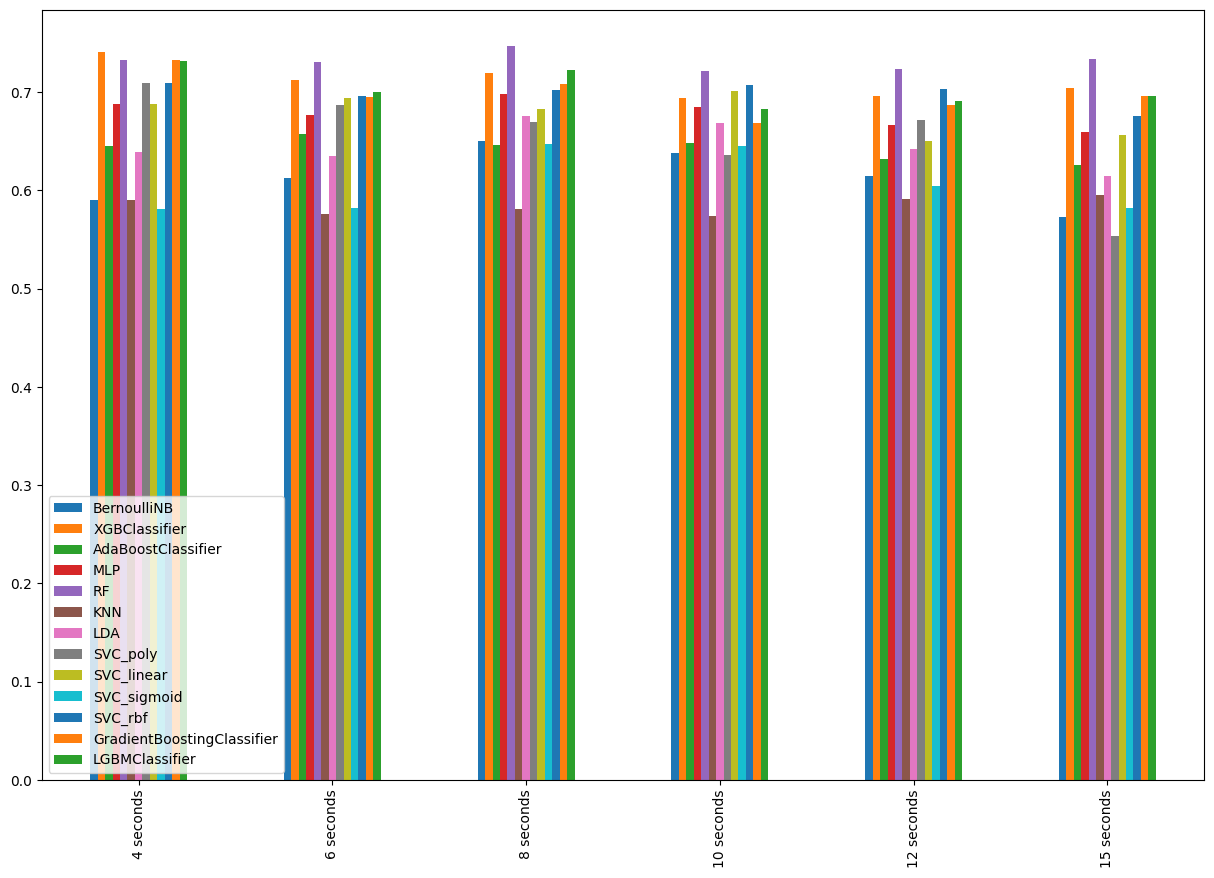

In [17]:
dur_acc_df.plot(kind='bar', figsize=(15, 10))
plt.legend(loc='lower left')
plt.show()